# Seaborn
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- Fredriks ord: Seaborn bygger på matplotlib, där mindre kod behövs för ordentligt stylade grafer. Detta genom att templates finns som har mindre kod men i sin tur anropar massa annan kod i matplotlib för att få till önskad output
- Lätt att importera data från Panda
- I Tutorial kan man läsa mer om samtliga nedan grafer som visas
- Framförallt relation mellan datapunkter samt distribution kan man se. Se översiktsbild om relplot, displot och catplot.
    - https://seaborn.pydata.org/tutorial/function_overview.html
    - När det är kategorier: catplot, annars andra (normalt sett)
    - Här finns många dataset att använda för analys i seaborn: # https://github.com/mwaskom/seaborn-data

In [2]:
import seaborn as sns
# Standard att importera som sns

In [3]:
# Titta på figure vs. axis level plot, läs igenom.
# https://seaborn.pydata.org/tutorial/function_overview.html
# Utifrån dokumentationen - se figure vs axis level plot, bra översiktsbild där.
# figure - level: hela figuren med graf och allt är template baserat på underliggande matplotlib kod. 
            # Mindre kod behövs för färdigt stylade plottar
# Axis l level - : Enbart axes som grafen plottas på med dett legend och axeltitlar färdiga. Resten kan man lägga till.
    # Mer manuellt alltså baserat på matplotlib kod som man kan lägga till.

In [4]:
# Här finns många dataset att använda för analys i seaborn: # https://github.com/mwaskom/seaborn-data

# Vi använder data från den sidan som heter "tips"

tips = sns.load_dataset("tips")  # Här läser vi in denna data och refererar variabelnamnet tips till den

tips         # Skriva ut hela tabellen

tips.head()  # head för att få ut 5 första raderna

tips.head(2) # Får ut två första raderna, man kan inom parentes ange detta.

tips.tail()  # Sista 5 raderna och likaså här kan man inom parentes ange om man vill få ut x antal rader från slutet


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


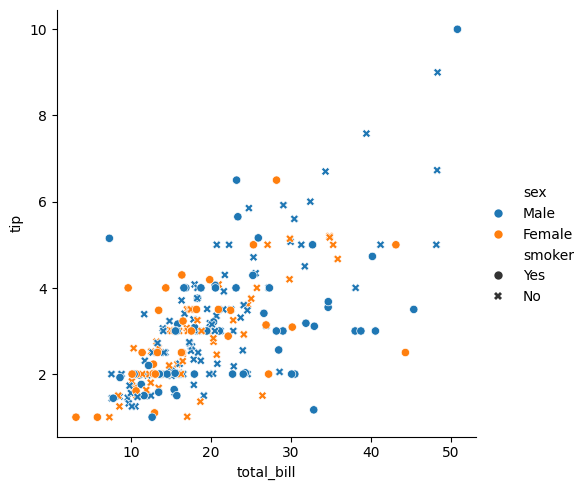

In [5]:
# Att plotta denna data utifrån figure-level template:n relplot().
# relplot() används för att hitta relation mellan variabler. 
    # https://seaborn.pydata.org/generated/seaborn.relplot.html   API reference för denna plot, kan se alla funktioner. Står bl.a:
        # scatterplot() (with kind="scatter"; the default)
        # lineplot() (with kind="line")
        # innebär att man kan skriva de plottarna via dess egen funktion eller via kind parameter i relplot()
        # Default i relplot är scatterplot, man får skriva kind ="line" för linjeplott. 
        # Det finns två kind här: scatterplot och lineplot

sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", data = tips)               

# Mer om ovan kod:
    # data = 'tips' är datan som laddas in och därför skrivs det inte i citationstecken i koden.
    # hue är färg. Färgkodar prickarna och lägger till legend för att påtala vilken kategori som tillhör vilken färg
    # style är olika sorters markers - i detta fall rökare/icke-rökare. 



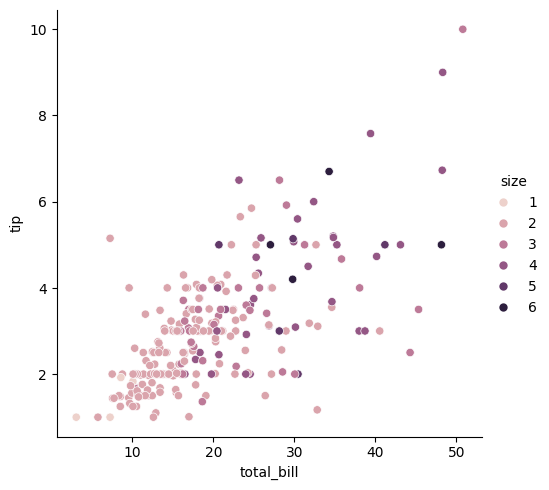

In [5]:
# Här läggs en numeric som färg, får då skalor på detta sätt

sns.relplot(x = "total_bill", y = "tip", hue = "size", data = tips)    

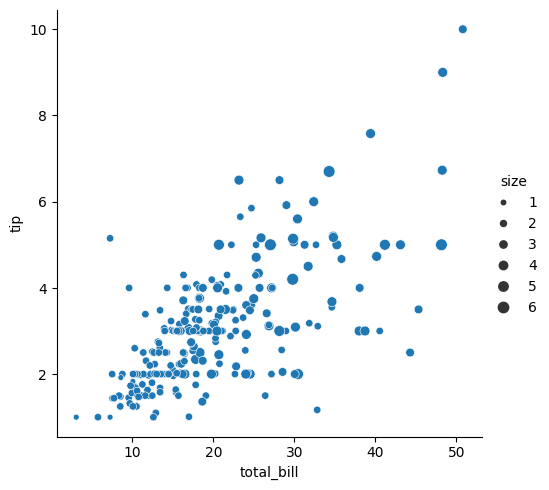

In [6]:
sns.relplot(x = "total_bill", y = "tip", size = "size", data = tips)   
# Här läggs size som också ger skala i storlekar. Denna går att korrigera se nästa kodruta

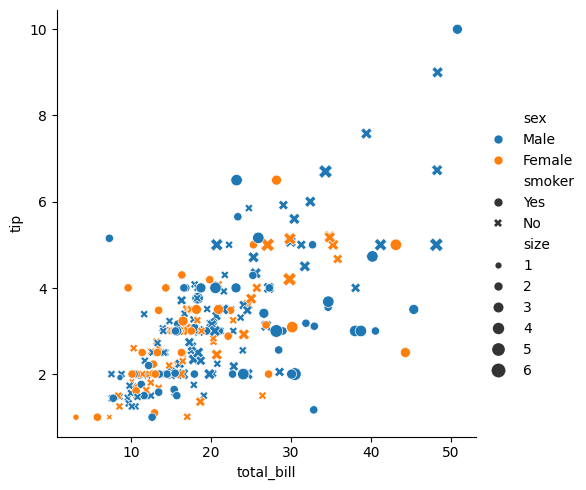

In [8]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", size = "size", sizes = (20,100), data = tips)
# sizes parameter kan användas för att ändra storlekarna manuellt antingen som ett intervall 
# eller att via lista skriva ut exakta storlekar vi vill få ut per size. T.ex. [2,3,4,6,100]


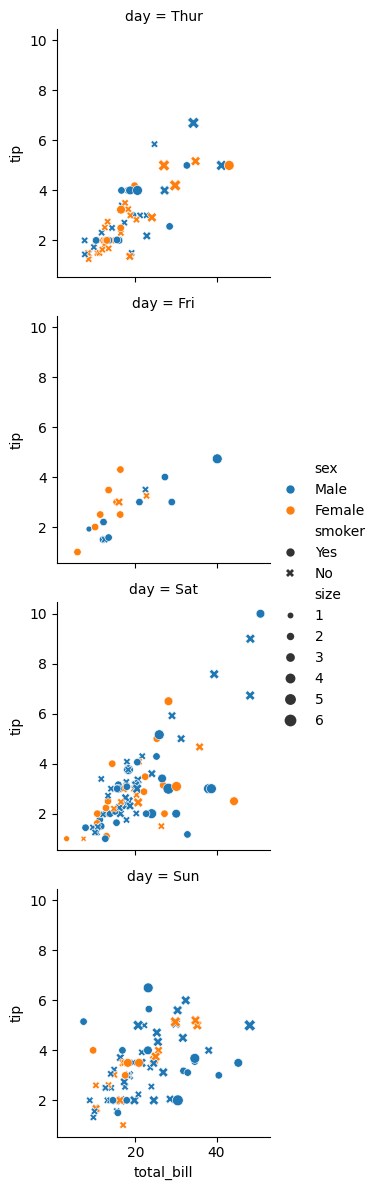

In [9]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", size = "size", row = "day", height = 3, data = tips)
# Height ändrar storlek på plot, här minskar vi den. 
# Row samlar alla i den kolumn man filterar i rad. Här blir det varje dag per egen rad.


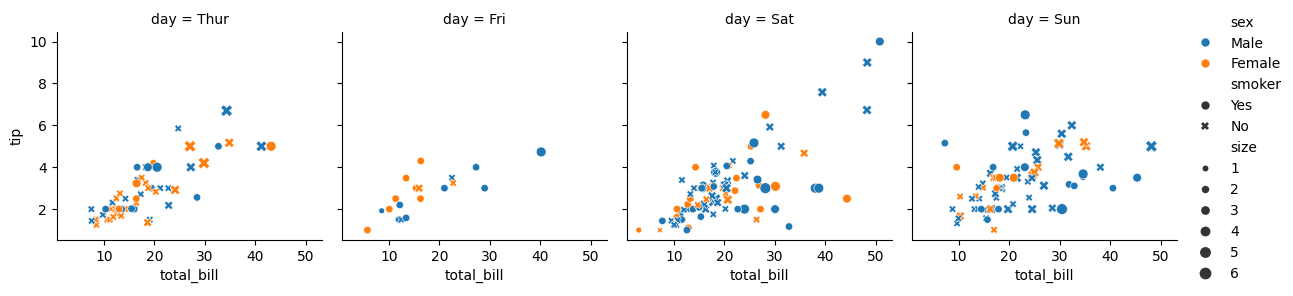

In [30]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", size = "size", col = "day", height = 3, data = tips)

# col -  lägger upp det i bredden, här blir det dagarna uppradade i bredden (kolumnvis)

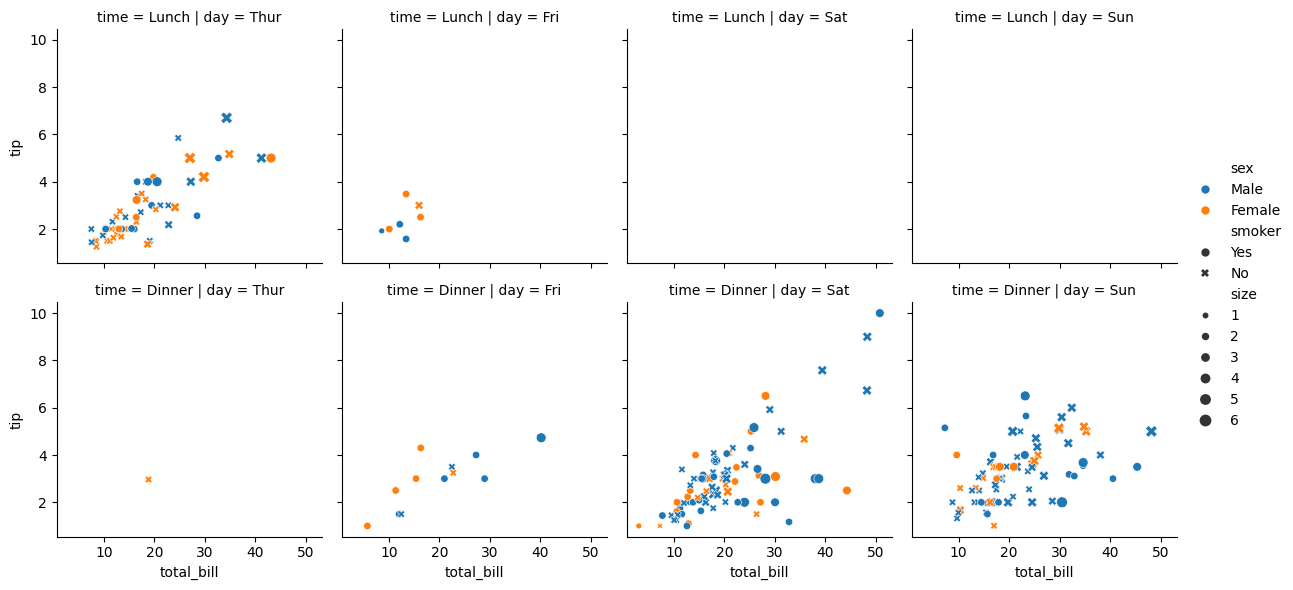

In [31]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", size = "size", col = "day", row= "time", height = 3,  data = tips)

# col - lägger upp det i bredden
# row - lägger till time här också, blir då två rader en för varje tid men också dagarna i kolumnbredd.
# Går även via col_wrap och slippa fler rader göra att det är färre kolumner per rad, se nästa kodruta


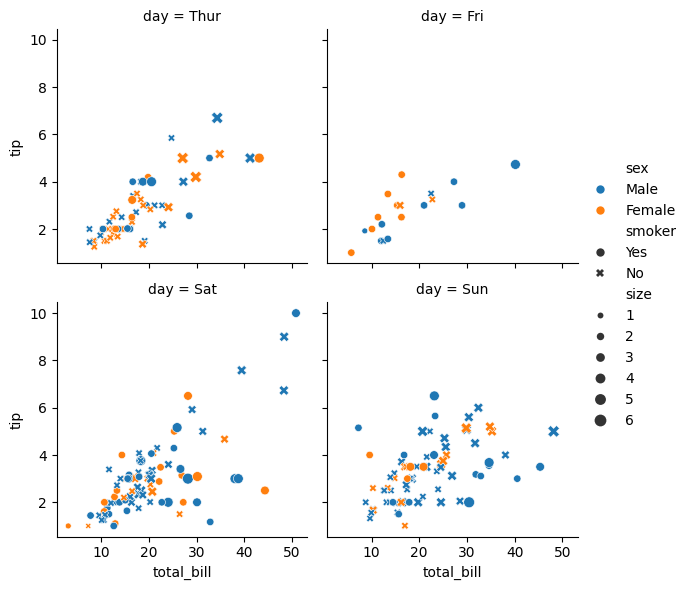

In [10]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", size = "size", col = "day", col_wrap = 2, height = 3,  data = tips)

# Antingen kan man ha både col och row för att få det i flera rader och inte bara lång kolumn,
# Det går även att använda col_wrap för att inte ha rows och istället wrappa kolumner i kortare längd.


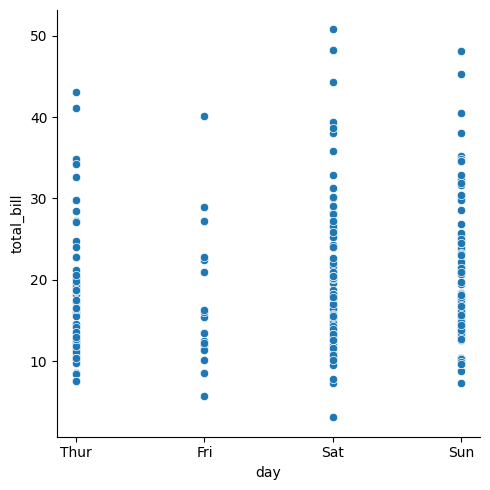

In [33]:
sns.relplot(x= "day", y="total_bill", data = tips)
# Om vi skulle plotta enligt nedan sätt så blir det såhär så blir det svårt att tyda.
# Därför har vi kategorical plots för att se hur de är kategoriserade bättre
    # Se kommande grafer

<Axes: xlabel='day', ylabel='total_bill'>

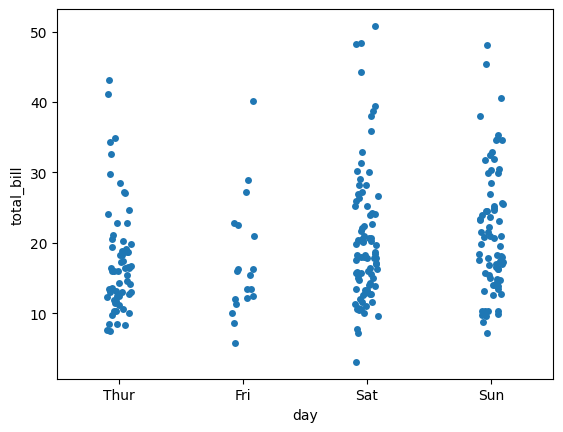

In [34]:
sns.stripplot(x= "day", y="total_bill", data=tips)
# Sprider ut de lite random i x led för att man ska kunna se skillnad

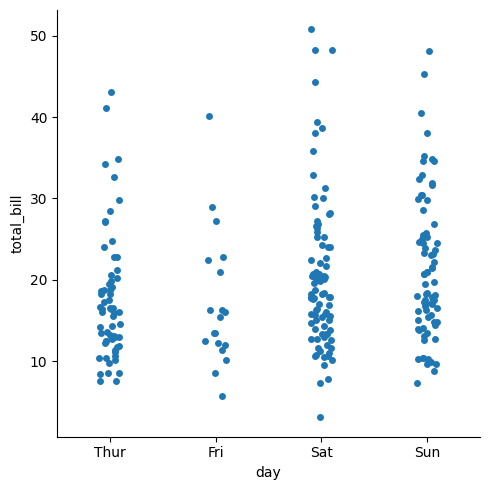

In [11]:
sns.catplot(x= "day", y="total_bill", kind="strip", data=tips)
# samma plot men via dess huvud plot (categorical plots, se översiktsbild på deras hemsida tutorial)
# Här anges istället kind "strip"

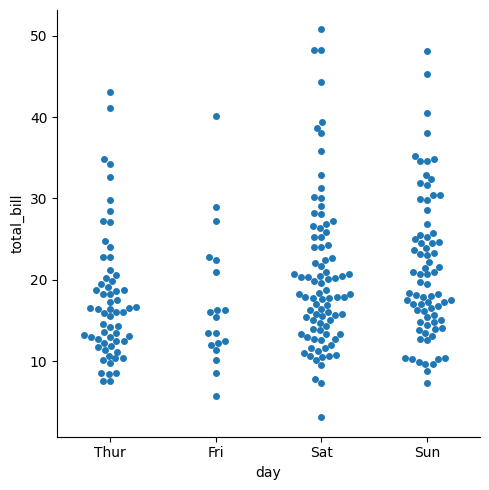

In [12]:
sns.catplot(x= "day", y="total_bill", kind="swarm", data=tips)
# Här anges istället kind "swarm"
# En swarmplot gör att datapunkter inte överlappar varandra. 
# Funkar bättre på mindre mängder data


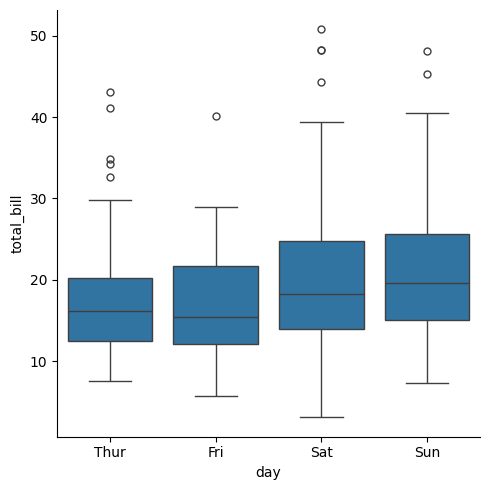

In [13]:
sns.catplot(x= "day", y="total_bill", kind = "box", data=tips)
# Sprider ut de lite random i x led för att man ska kunna se skillnad
# Låddiagram, lämnar vissa outlier punkter
# Box funkar alltid oavsett antal punkter. De tidigare ej likabra vid många punkter.


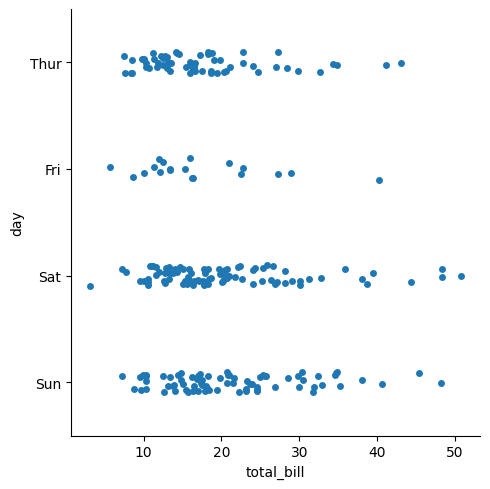

In [15]:
sns.catplot(x= "total_bill", y="day", kind = "strip", data=tips)
# Här vrider man på den så det blir andra hållet (byter x och y värden)


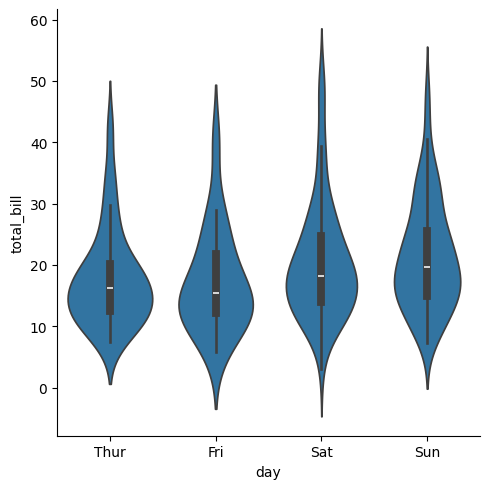

In [28]:
sns.catplot(x= "day", y="total_bill", kind = "violin", data=tips)
# En violinplot


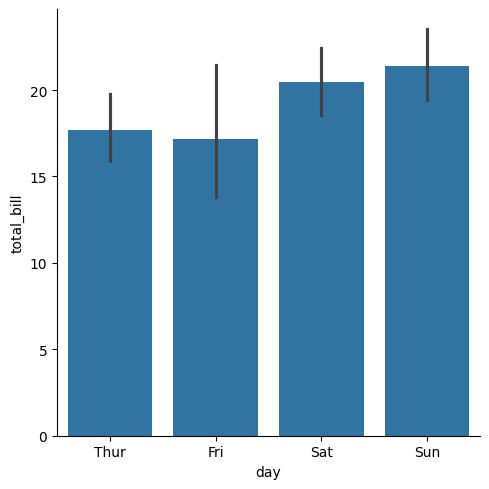

In [22]:
sns.catplot(x="day" , y="total_bill", kind = "bar", data=tips)

# Barplot här ger medelvärde av alla punkter per dag och strecket någon felmarginal
# Finns också 

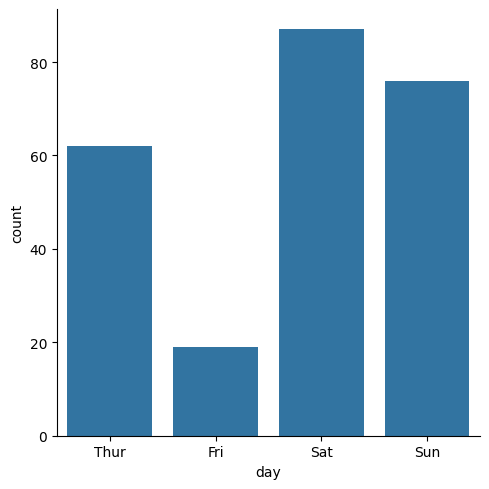

In [24]:
sns.catplot(x="day", kind = "count", data=tips)

# här via kind = count, får ut antal istället

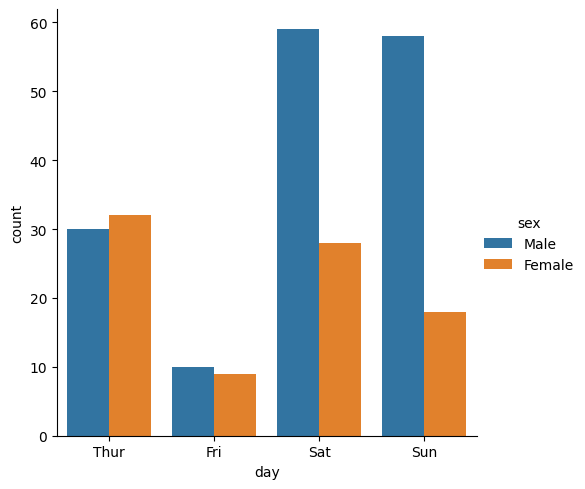

In [8]:
sns.catplot(x="day", kind = "count", hue = "sex", data=tips)

# här via kind = count, får ut antal istället och delar upp utifrån kön som får olika färg

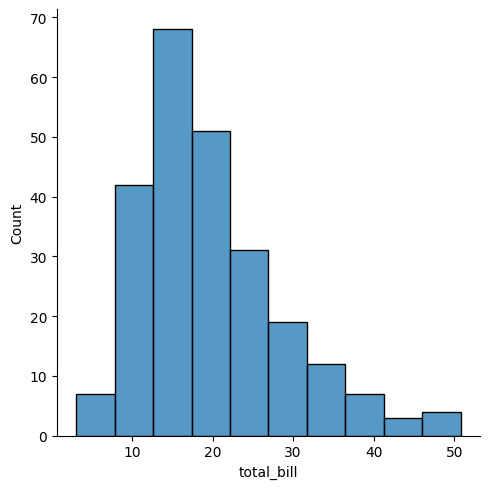

In [9]:
sns.displot(x = "total_bill",bins =10, data = tips)
# kind = hist , är default
# Ju smalare(fler) bins desto mer ser man variationerna.
# Testa använda penguins dataset om du vill, det syns tydligt där. 
# Man får välja antalet med omsorg - för att inte få för spretigt och rörigt (för många),
# Men inte heller missa viktiga distributioner (för få - missar då att det kan finnas två distributioner)

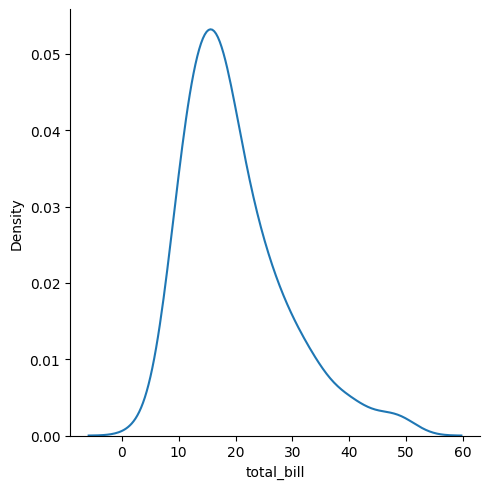

In [21]:
sns.displot(x = "total_bill", kind = "kde", data = tips)

# Visar distributionen kontinuerligt istället för bins
# kde - "kernal density estimation"